## Multivariate Regression

Multivariate regression is a statistical method used to examine the relationship between a dependent variable and two or more independent variables. It is an extension of simple linear regression, which only considers one independent variable.

In multivariate regression, the dependent variable is predicted by a linear combination of the independent variables. The goal is to identify the linear relationship between the dependent variable and independent variables, and to use this relationship to predict the value of the dependent variable for new observations.

Multivariate regression is widely used in many fields, including economics, finance, psychology, social sciences, and engineering, among others. It is a powerful tool for analyzing complex relationships between variables and making predictions based on those relationships.

## Aim 
**To predict body fat from tables with their age and various skin-fold using MultiVariate Regression**



## Data

The data used was gotten from Kaggle.com

The data is about body fat prediction determined by underwater
weighing and various body circumference measurements for 252 men.


## Libraries Used:

In [555]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pylab import *
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load data set 

In [556]:
# The read_csv() function is used to retrirve data from csv file 
df = pd.read_csv('bodyfat.csv')

## Content


Density determined from underwater weighing  
Percent body fat from Siri's (1956) equation  
Age (years)  
Weight (lbs)  
Height (inches)  
Neck circumference (cm)  
Chest circumference (cm)  
Abdomen 2 circumference (cm)  
Hip circumference (cm)  
Thigh circumference (cm)  
Knee circumference (cm)  
Ankle circumference (cm)  
Biceps (extended) circumference (cm)  
Forearm circumference (cm)  
Wrist circumference (cm)  

In [557]:
#checking samples
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [558]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

Step 2: Analyze Data 

In [559]:
#This shows the number of entries, columns names and types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [560]:
#Describing statistical information value of the dataset like max, min, sd, mean etc.
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


### Observation 

Looking at BodyFat -> the min value = 0
[This body fat is considered to be impossible to achieved] (ref: https://www.menshealth.com/health/a33247811/ronnie-coleman-body-fat/)

I formed a hypothesis that any body fat measurement below 2% is likely to be a miscalculation. As a result, I removed all recorded instances of body fat below this threshold.

In [561]:
df = df.loc[df['BodyFat']>= 2]

In [562]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055190,19.30120,44.944000,179.378800,70.176000,38.024800,100.950400,92.718800,100.007200,59.492400,38.626000,23.118400,32.321600,28.691200,18.242000
std,0.018607,8.23016,12.633101,29.059153,3.663086,2.412706,8.328483,10.667279,7.097397,5.179018,2.387569,1.690198,2.981741,2.004554,0.926992
min,0.995000,3.00000,22.000000,125.000000,29.500000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.60000,36.000000,159.375000,68.312500,36.400000,94.675000,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054800,19.25000,43.500000,176.750000,70.125000,38.000000,99.700000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,1.070050,25.30000,54.000000,197.000000,72.250000,39.475000,105.525000,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,1.099100,47.50000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [563]:
#Checking for null values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

## Checking correlation between data



To check if there is corrolation 

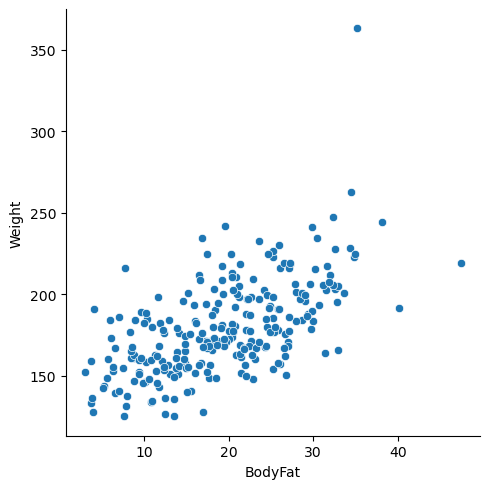

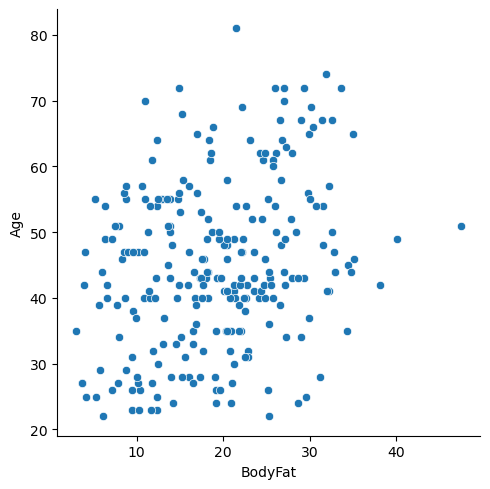

In [564]:
sns.relplot(x='BodyFat', y = 'Weight', data = df)
sns.relplot(x='BodyFat', y = 'Age', data = df)


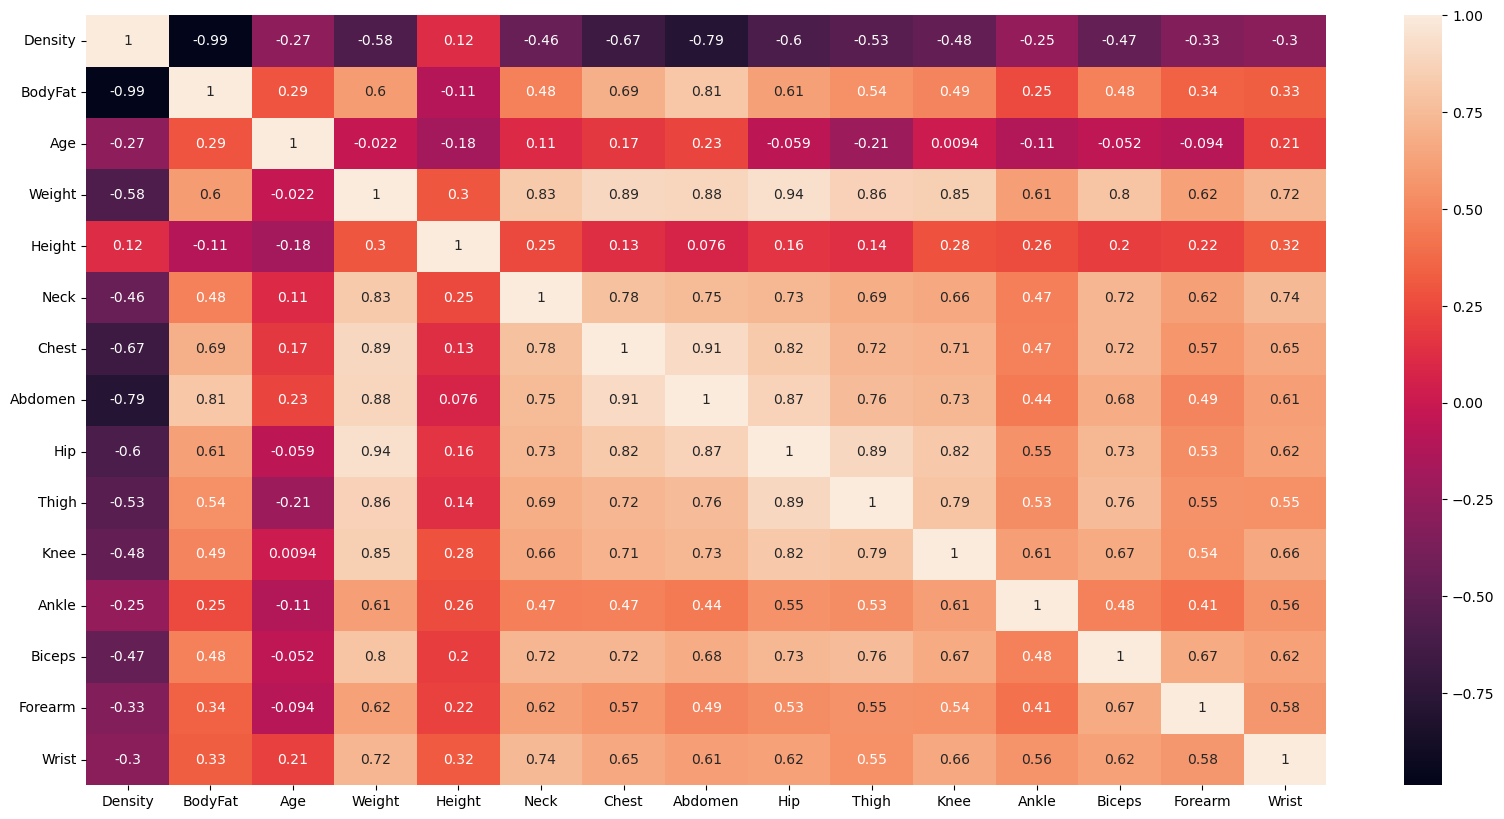

In [565]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Observation

Some colunms have weak corrolation with body fat I'm going to remove some of the columns which  has a weak relationship with Bodyfat than others that i believe could affect assumption

In [566]:
#Selecting x and y for input variables (droping the other colunms for this case)

x = df.drop(columns= ['BodyFat', 'Height', 'Ankle', 'Wrist'])
y = df['BodyFat']

In [567]:
x

,Density,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,Forearm
0,1.0708,23,154.25,36.2,93.1,85.2,94.5,59.0,37.3,32.0,27.4
1,1.0853,22,173.25,38.5,93.6,83.0,98.7,58.7,37.3,30.5,28.9
2,1.0414,22,154.00,34.0,95.8,87.9,99.2,59.6,38.9,28.8,25.2
3,1.0751,26,184.75,37.4,101.8,86.4,101.2,60.1,37.3,32.4,29.4
4,1.0340,24,184.25,34.4,97.3,100.0,101.9,63.2,42.2,32.2,27.7
...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,34.9,89.2,83.6,88.8,49.6,34.8,25.6,25.7
248,1.0236,72,201.00,40.9,108.5,105.0,104.5,59.6,40.8,35.2,28.6
249,1.0328,72,186.75,38.9,111.1,111.5,101.7,60.3,37.3,31.3,27.2
250,1.0399,72,190.75,38.9,108.3,101.3,97.8,56.0,41.6,30.5,29.4


In [568]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 250, dtype: float64


### Split dataset into traning and testing set, we use 80% for traning and 20% of the data for testing.

In [569]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size =.2, random_state=0)

In [570]:
x_train

,Density,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,Forearm
71,1.0788,55,146.75,38.7,88.5,82.8,95.5,58.9,37.6,30.3,27.3
160,1.0775,31,151.25,35.0,94.0,81.2,91.5,52.5,36.6,27.0,26.3
182,1.0725,40,145.75,35.5,95.5,83.6,91.6,54.1,36.2,31.4,28.3
75,1.0666,61,148.25,36.0,91.6,81.8,94.8,54.5,37.0,29.3,27.0
59,1.0430,61,179.75,38.4,104.8,98.3,99.6,60.6,37.7,34.5,29.6
...,...,...,...,...,...,...,...,...,...,...,...
67,1.0673,55,154.75,36.9,95.4,86.6,91.8,54.3,35.4,32.8,27.4
194,1.0470,42,162.75,35.4,92.2,85.6,96.5,60.2,38.9,31.7,27.1
117,1.0671,51,179.00,41.0,99.2,90.0,96.4,56.8,38.8,33.4,29.8
47,1.0665,39,148.50,34.6,89.8,79.5,92.7,52.7,37.5,28.8,26.8


In [571]:
x_train.count()

Density    200
Age        200
Weight     200
Neck       200
Chest      200
Abdomen    200
Hip        200
Thigh      200
Knee       200
Biceps     200
Forearm    200
dtype: int64

In [572]:
y_test.count()

50

In [573]:
x_test.count()

Density    50
Age        50
Weight     50
Neck       50
Chest      50
Abdomen    50
Hip        50
Thigh      50
Knee       50
Biceps     50
Forearm    50
dtype: int64

#### Fit regression model using Linear regression to train our model 

In [574]:
regressor = LinearRegression()
regressor.fit (x_train, y_train)


LinearRegression()

## Predicting test set values 

In [575]:
y_pred = regressor.predict(x_test)
comparsion_df = pd.DataFrame({'Actual' :y_test, 'Predicted': y_pred})

In [576]:
x_test

,Density,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,Forearm
227,1.0418,55,198.50,38.3,105.3,96.7,106.6,64.0,42.6,33.2,30.0
122,1.0652,40,160.25,36.9,99.3,83.3,97.5,60.5,38.7,34.4,28.0
92,1.0795,47,165.25,37.5,97.2,83.1,95.4,56.9,38.3,30.1,28.2
157,1.0761,28,182.50,37.0,98.5,90.8,102.5,60.8,38.5,31.6,28.0
154,1.0510,27,200.25,38.2,101.1,100.1,105.0,62.1,40.0,33.7,29.2
161,1.0653,33,196.00,38.5,103.8,95.6,105.1,61.4,40.6,31.3,29.2
200,1.0709,43,178.25,37.8,102.7,89.2,99.2,60.2,39.2,31.7,28.4
83,1.0377,70,170.75,38.7,101.8,94.9,95.0,56.0,36.5,31.2,27.3
63,1.0403,61,178.00,37.4,105.3,99.7,99.7,60.8,40.1,33.6,29.0
155,1.0594,28,171.50,35.6,92.1,83.5,98.3,57.3,37.8,32.2,27.7


In [577]:
y_pred

array([25.38295455, 14.66600833,  9.12587048, 10.49543938, 20.93178553,
       15.47054485, 12.95336121, 26.7368501 , 25.8943506 , 16.66325875,
       13.06138724, 26.31231936, 17.97562682, 20.92500418, 20.13496728,
       13.12709971, 16.57397041, 20.98138756,  9.73768584, 10.40993452,
       30.30714935, 14.16568045, 29.35944687, 27.87044314,  9.14461285,
       20.88276264,  4.4793975 , 22.87390351, 21.56301738, 28.15703242,
       31.49795925,  9.07305908, 19.42746614, 25.58504126, 21.45805712,
       20.96107418, 18.46032338, 21.26255892, 14.91265853, 26.26192976,
       24.96935649, 20.78668387, 19.13260987, 30.25496432, 14.68249496,
       11.92948842, 13.36518917,  7.47594006, 31.68739631, 26.53103187])

In [578]:
#comparing the actual and the predicted value 
comparsion_df

,Actual,Predicted
227,25.2,25.382955
122,14.7,14.666008
92,8.5,9.125870
157,10.0,10.495439
154,21.0,20.931786
161,14.6,15.470545
200,12.2,12.953361
83,27.0,26.736850
63,25.8,25.894351
155,17.3,16.663259


## Model Evaluation

In [579]:
y_pred=regressor.predict(x_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_mae = mean_absolute_error(y_train, y_pred)
r2=r2_score(y_train, y_pred)
print('Mean Squared Error', lin_mse.round(2))
print('Mean Absolute Error', lin_mae.round(2))
print('R squared', r2)

Mean Squared Error 1.79
Mean Absolute Error 0.54
R squared 0.974826836752809


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

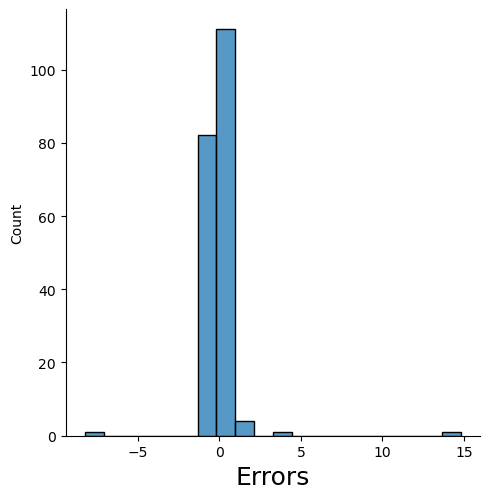

In [584]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Conclusion

The multivariate regression analysis appears to be a good fit for our data, as indicated by the high R-squared value of 0.97. Additionally, the mean squared error and mean absolute error, which are 1.79 and 0.54 respectively, are relatively low. Also error terms normally distributed.